# Capstone Project Ecommerce Analysis

In [1]:
## Importing ncecesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
## Setting up display options
## Setting up file options
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)

In [2]:
## Reading input file 
cs_ecom = pd.read_excel(r"C:\Users\Parth\Desktop\Imarticus\R\Capston_Project\E-com_Data.xlsx")

In [3]:
## Span of data for 12 months and 7 days i.e. 382 days from 2nd December 2016 to 19th December 2017
days = cs_ecom['Date of purchase'].max() - cs_ecom['Date of purchase'].min()
days

Timedelta('382 days 00:00:00')

In [4]:
## Describing shape of the data
cs_ecom.shape

(537979, 12)

In [5]:
## Describing coloumn contains
cs_ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537979 entries, 0 to 537978
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         404189 non-null  float64       
 1   Item Code          537979 non-null  object        
 2   InvoieNo           537979 non-null  int64         
 3   Date of purchase   537979 non-null  datetime64[ns]
 4   Quantity           537979 non-null  int64         
 5   Time               537979 non-null  object        
 6   price per Unit     537979 non-null  float64       
 7   Price              537979 non-null  float64       
 8   Shipping Location  537979 non-null  object        
 9   Cancelled_status   8345 non-null    float64       
 10  Reason of return   3 non-null       object        
 11  Sold as set        0 non-null       float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(4)
memory usage: 49.3+ MB


In [6]:
## Calculating percentage null values Cancelled status, Reason of return and sold as sets have more than 97% of null values
per_null = round(cs_ecom.isnull().sum()/cs_ecom.shape[0]*100, ndigits = 2)
per_null

CustomerID            24.87
Item Code              0.00
InvoieNo               0.00
Date of purchase       0.00
Quantity               0.00
Time                   0.00
price per Unit         0.00
Price                  0.00
Shipping Location      0.00
Cancelled_status      98.45
Reason of return     100.00
Sold as set          100.00
dtype: float64

In [7]:
## Dropping 9 duplicates entries from the dataset
cs_ecom_dup = cs_ecom.drop_duplicates(keep="first")
cs_ecom_dup.shape

(537970, 12)

In [8]:
## Evaluating impact of time factor
time_factor = cs_ecom.groupby(['Time'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False)
time_factor

,Time,CustomerID
370,13:35:00,1834
311,12:36:00,1799
316,12:41:00,1670
300,12:25:00,1619
291,12:16:00,1615
...,...,...
1,06:12:00,1
699,19:06:00,1
734,19:41:00,1
0,06:10:00,1


In [9]:
## Dropping null
cs_ecom_null = cs_ecom_dup[cs_ecom_dup.isnull()]
cs_ecom_null.shape

(537970, 12)

In [10]:
ecom_df = cs_ecom_dup.iloc[:, [0,2,3,7]]
ecom_df.shape

(537970, 4)

In [11]:
## Creating new dataframe by dropping null and unimportant cols 
# new df has (404181, 4) in comparison with original dataframe which has (537970, 12) - 133789 customer ids were dropped and 8 insignificant cols
cs_ecom_1 = ecom_df.dropna()  
cs_ecom_1.shape

(404181, 4)

In [12]:
## converting custid from float to int
cs_ecom_1 = cs_ecom_1.astype({'CustomerID':int})
cs_ecom_1.head()

,CustomerID,InvoieNo,Date of purchase,Price
0,4355,398177,2017-10-29,1926.0
1,4352,394422,2017-10-05,1740.0
2,4352,394422,2017-10-12,1866.0
3,4352,388633,2017-08-22,1869.0
4,4352,394422,2017-10-10,1888.0


In [13]:
## Finding out min. price 
cs_ecom_1['Price'].min()

-10152.0

In [14]:
## Dropping proice which has less than 0 values  new shape of the dataframe is:(395998, 4)
cs_ecom_1 = cs_ecom_1[cs_ecom_1.Price> 0]
cs_ecom_1.shape

(395998, 4)

In [15]:
## Renaming cols - removing space within name to the new one
cs_ecom_1.rename(columns={'InvoieNo':'InvoiceNo','Date of purchase':'Date_of_purchase'},inplace=True)

In [16]:
cs_ecom_1.head()

,CustomerID,InvoiceNo,Date_of_purchase,Price
0,4355,398177,2017-10-29,1926.0
1,4352,394422,2017-10-05,1740.0
2,4352,394422,2017-10-12,1866.0
3,4352,388633,2017-08-22,1869.0
4,4352,394422,2017-10-10,1888.0


## EDA for the refined dataframe..
## find out unique values

In [17]:
per_null = round(cs_ecom.isnull().sum()/cs_ecom.shape[0]*100, ndigits = 2)
per_null

CustomerID            24.87
Item Code              0.00
InvoieNo               0.00
Date of purchase       0.00
Quantity               0.00
Time                   0.00
price per Unit         0.00
Price                  0.00
Shipping Location      0.00
Cancelled_status      98.45
Reason of return     100.00
Sold as set          100.00
dtype: float64

In [18]:
## Importing datetime to treat dates in the dataframe
import datetime as dt

In [19]:
## Setting up recency as 1 day plus this will help to take last date into account
recency_date=dt.datetime(2017,12,20)

In [20]:
r=cs_ecom_1.groupby('CustomerID',as_index=False).agg({'Date_of_purchase': lambda x:(recency_date -x.max()).days})
r

,CustomerID,Date_of_purchase
0,2,4
1,3,77
2,4,19
3,5,311
4,6,37
...,...,...
4319,4368,278
4320,4369,181
4321,4370,9
4322,4371,4


In [21]:
## Hardcoding the freq
f=cs_ecom_1.groupby('CustomerID',as_index=False).agg({'InvoiceNo': lambda x:(x.nunique())})

In [22]:
f.InvoiceNo.value_counts()

1      1507
2       823
3       500
4       392
5       239
6       173
7       136
8        98
9        69
10       57
11       54
12       42
13       28
15       25
17       21
14       20
18       14
20       12
19       12
21       10
16       10
25        9
26        7
22        5
31        5
27        5
37        4
28        4
23        4
34        3
30        3
24        3
49        2
39        2
55        2
43        2
91        2
32        2
62        1
41        1
38        1
29        1
36        1
51        1
33        1
61        1
48        1
206       1
35        1
47        1
199       1
69        1
86        1
97        1
57        1
124       1
Name: InvoiceNo, dtype: int64

In [23]:
f.Date_of_purchase.isnull().sum()

AttributeError: 'DataFrame' object has no attribute 'Date_of_purchase'

In [ ]:
f.freq.value_counts()

In [ ]:
##f['freq']= round(f['Date_of_purchase'] /f['InvoiceNo'])>0
##f=f.astype("int")
## f['freq'].value_counts()
## f[f.freq==0]
##m[m.CustomerID==4049]*

In [25]:
m=cs_ecom_1.groupby('CustomerID',as_index=False).agg({'Price' : lambda x :(x.sum())})
m

,CustomerID,Price
0,2,553704.0
1,3,257404.0
2,4,176613.0
3,5,41976.0
4,6,166972.0
...,...,...
4319,4368,20480.0
4320,4369,10774.0
4321,4370,25177.0
4322,4371,280608.0


In [26]:
m.min()

CustomerID      2.0
Price         388.0
dtype: float64

In [27]:
## Cutomer ID 4049 ahs less invoice number and low date of purchase
f[f.freq==0]

AttributeError: 'DataFrame' object has no attribute 'freq'

In [28]:
m[m.CustomerID==4049]

,CustomerID,Price
4004,4049,628496.0


In [29]:
m.drop('CustomerID',axis=1,inplace=True)
f.drop('CustomerID',axis=1,inplace=True)

In [30]:
rmf = pd.concat([r,f,m],axis=1)
rmf.columns=["CustomerID","Recency","Frequency","Monetary"]
rmf

,CustomerID,Recency,Frequency,Monetary
0,2,4,7,553704.0
1,3,77,4,257404.0
2,4,19,1,176613.0
3,5,311,1,41976.0
4,6,37,7,166972.0
...,...,...,...,...
4319,4368,278,1,20480.0
4320,4369,181,1,10774.0
4321,4370,9,2,25177.0
4322,4371,4,16,280608.0


In [ ]:
rmf['r_quartile'] = pd.qcut(rmf['Recency'], 4, ['4','3','2','1'])
rmf['m_quartile'] = pd.qcut(rmf['Monetary'], 4, ['1','2','3','4'])

In [32]:
rmf.describe()

,CustomerID,Recency,Frequency,Monetary
count,4324.000000,4324.000000,4324.000000,4.324000e+03
mean,2185.346438,93.755319,4.233349,2.339841e+05
std,1261.594396,100.115549,7.583441,8.636663e+05
min,2.000000,1.000000,1.000000,3.880000e+02
25%,1092.750000,19.000000,1.000000,3.928800e+04
50%,2182.500000,52.000000,2.000000,8.614700e+04
75%,3279.250000,143.250000,5.000000,2.108338e+05
max,4372.000000,381.000000,206.000000,3.553619e+07


In [ ]:
rmf.Frequency[rmf.Frequency<=4] =1
rmf.Frequency[(rmf.Frequency>1) & (rmf.Frequency <10)] =2
rmf.Frequency[(rmf.Frequency>2) & (rmf.Frequency <40)] =3
rmf.Frequency[(rmf.Frequency>3)] =4

In [ ]:
rmf.r_quartile.value_counts()

In [ ]:
plt.figure(figsize=(10,8))
plt.hist(rmf.Monetary, bins=100)

In [36]:
from sklearn.cluster import KMeans

In [37]:
cs_clus = KMeans()

In [34]:
cs_rmf_df = rmf 

In [38]:
l1 = []
for k in range(1,11):
    cs_clus = KMeans( n_clusters=k)
    ssd = np.abs(cs_clus.fit(cs_rmf_df).score(cs_rmf_df))
    l1.append(ssd)  
num = list(range(1,11))

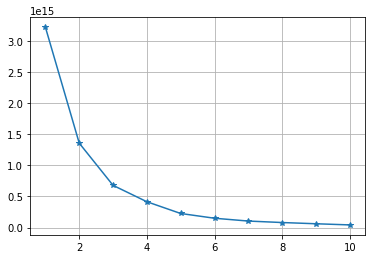

In [39]:
plt.plot(num,l1,marker = "*")
plt.grid()

In [40]:
cs_clus = KMeans( n_clusters=4)
ssd = np.abs(cs_clus.fit(cs_rmf_df).score(cs_rmf_df))

In [41]:
final_df = pd.concat([cs_rmf_df,pd.Series(cs_clus.labels_)],axis=1)
final_df.head(5)

,CustomerID,Recency,Frequency,Monetary,0
0,2,4,7,553704.0,0
1,3,77,4,257404.0,0
2,4,19,1,176613.0,0
3,5,311,1,41976.0,0
4,6,37,7,166972.0,0


In [42]:
final_df[0].value_counts()

0    4219
3      93
1      11
2       1
Name: 0, dtype: int64

In [43]:
final_df.rename(columns={final_df.columns[-1]: 'Label'})

,CustomerID,Recency,Frequency,Monetary,Label
0,2,4,7,553704.0,0
1,3,77,4,257404.0,0
2,4,19,1,176613.0,0
3,5,311,1,41976.0,0
4,6,37,7,166972.0,0
...,...,...,...,...,...
4319,4368,278,1,20480.0,0
4320,4369,181,1,10774.0,0
4321,4370,9,2,25177.0,0
4322,4371,4,16,280608.0,0


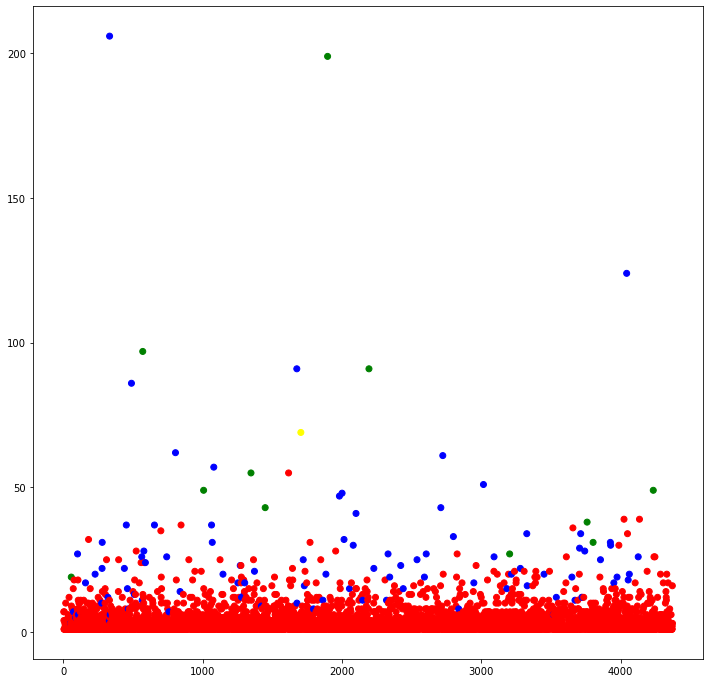

In [51]:
colourmap = np.array(["Red","Green","Yellow","Blue",])
plt.figure(figsize=(12,12))
plt.scatter(cs_rmf_df.CustomerID, cs_rmf_df.Frequency, c= colourmap[cs_clus.labels_])
plt.show()

In [49]:
cs_rmf_df.columns

Index(['CustomerID', 'Recency', 'Frequency', 'Monetary'], dtype='object')